In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
%config InlineBackend.figure_format = 'retina'

### University Avenue

In [3]:
ndata_ua = np.load("stacking data.npy")

In [4]:
ndata_ua = np.vstack((ndata_ua,np.zeros((400,601))))

In [5]:
f_k_result_ua = np.abs(np.fft.fft2(ndata_ua)) # employ 2d fourier transform
f_k_result_ua = np.fft.fftshift(f_k_result_ua) # Shift the zero-frequency component to the center of the spectrum 

In [6]:
wavenumbers_ua = np.fft.fftfreq(601, d=1)  # size equals axis 1 of ndata
freqs_ua = np.fft.fftfreq(601, d=0.01)    # size equals axis 2 of ndata

In [7]:
wavenumbers_ua = np.fft.fftshift(wavenumbers_ua)
freqs_ua = np.fft.fftshift(freqs_ua)

In [8]:
f_ua,k_ua = np.meshgrid(freqs_ua,wavenumbers_ua)

In [9]:
f_k_result_ua = np.flip(f_k_result_ua,axis = 0) # calculate the minus wavenumber value

In [10]:
f_positive_indices = np.where(freqs_ua > 0)[0]
k_positive_indices = np.where(wavenumbers_ua > 0)[0]

In [11]:
f_first_quadrant_ua = freqs_ua[f_positive_indices]
k_first_quadrant_ua = wavenumbers_ua[k_positive_indices]

In [12]:
energy_first_quadrant_ua = f_k_result_ua[np.ix_(k_positive_indices,f_positive_indices)]
# extract the first quadrant data

In [13]:
f_p_ua,k_p_ua = np.meshgrid(f_first_quadrant_ua,k_first_quadrant_ua)

In [14]:
v_ua = f_p_ua/k_p_ua

### Menry Mall

In [15]:
ndata_hm = np.load("Henry_Mall_stacking.npy")

In [16]:
ndata_hm = np.vstack((ndata_hm,np.zeros((300,401))))

In [17]:
f_k_result_hm = np.abs(np.fft.fft2(ndata_hm))
f_k_result_hm = np.fft.fftshift(f_k_result_hm)

In [18]:
wavenumbers_hm = np.fft.fftfreq(401, d=1)  # calculate wavenumbers
freqs_hm = np.fft.fftfreq(401, d=0.01)    # calcualte frequency

In [19]:
wavenumbers_hm = np.fft.fftshift(wavenumbers_hm)
freqs_hm = np.fft.fftshift(freqs_hm)

In [20]:
f_hm,k_hm = np.meshgrid(freqs_hm,wavenumbers_hm)

In [21]:
f_k_result_hm = np.flip(f_k_result_hm,axis = 0)

In [22]:
f_positive_indices = np.where(freqs_hm > 0)[0]
k_positive_indices = np.where(wavenumbers_hm > 0)[0]

In [23]:
f_first_quadrant_hm = freqs_hm[f_positive_indices]
k_first_quadrant_hm = wavenumbers_hm[k_positive_indices]

In [24]:
energy_first_quadrant_hm = f_k_result_hm[np.ix_(k_positive_indices,f_positive_indices)]


In [25]:
f_p_hm,k_p_hm = np.meshgrid(f_first_quadrant_hm,k_first_quadrant_hm)

In [26]:
v_hm = f_p_hm/k_p_hm

In [27]:
funda_mode_hm = pd.read_excel('1113_mode_henry_mall.xlsx',sheet_name='Sheet1')
frist_mode_hm = pd.read_excel('1113_mode_henry_mall.xlsx',sheet_name='Sheet2')

### Obs Dr

In [28]:
ndata_od = np.load("Obs_Dr_stacking.npy")

In [29]:
ndata_od = np.vstack((ndata_od,np.zeros((400,601))))

In [30]:
f_k_result_od = np.abs(np.fft.fft2(ndata_od))
f_k_result_od = np.fft.fftshift(f_k_result_od)

In [31]:
wavenumbers_od = np.fft.fftfreq(601, d=1)  # calculate wavenumber
freqs_od = np.fft.fftfreq(601, d=0.01)    # calculate frequency

In [32]:
wavenumbers_od = np.fft.fftshift(wavenumbers_od)
freqs_od = np.fft.fftshift(freqs_od)

In [33]:
f_od,k_od = np.meshgrid(freqs_od,wavenumbers_od)

In [34]:
f_k_result_od = np.flip(f_k_result_od,axis = 0)

In [35]:
f_positive_indices = np.where(freqs_od > 0)[0]
k_positive_indices = np.where(wavenumbers_od > 0)[0]

In [36]:
f_first_quadrant_od = freqs_od[f_positive_indices]
k_first_quadrant_od = wavenumbers_od[k_positive_indices]

In [37]:
energy_first_quadrant_od = f_k_result_od[np.ix_(k_positive_indices,f_positive_indices)]


In [38]:
f_p_od,k_p_od = np.meshgrid(f_first_quadrant_od,k_first_quadrant_od)

In [39]:
v_od = f_p_od/k_p_od

In [40]:
energy_en = np.zeros(energy_first_quadrant_od.shape)
for i in range(len(energy_first_quadrant_od)):
    energy_en[i,:] = energy_first_quadrant_od[i,:]/np.max(energy_first_quadrant_od[i,:])

In [41]:
funda_mode_od = pd.read_excel('1113_mode_obs1.xlsx')


### Final figure

In [42]:
colors = ["white","blue", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

In [43]:
funda_mode = pd.read_excel('fundamental_mode.xlsx')
frist_mode = pd.read_excel('1st_mode_2.xlsx')

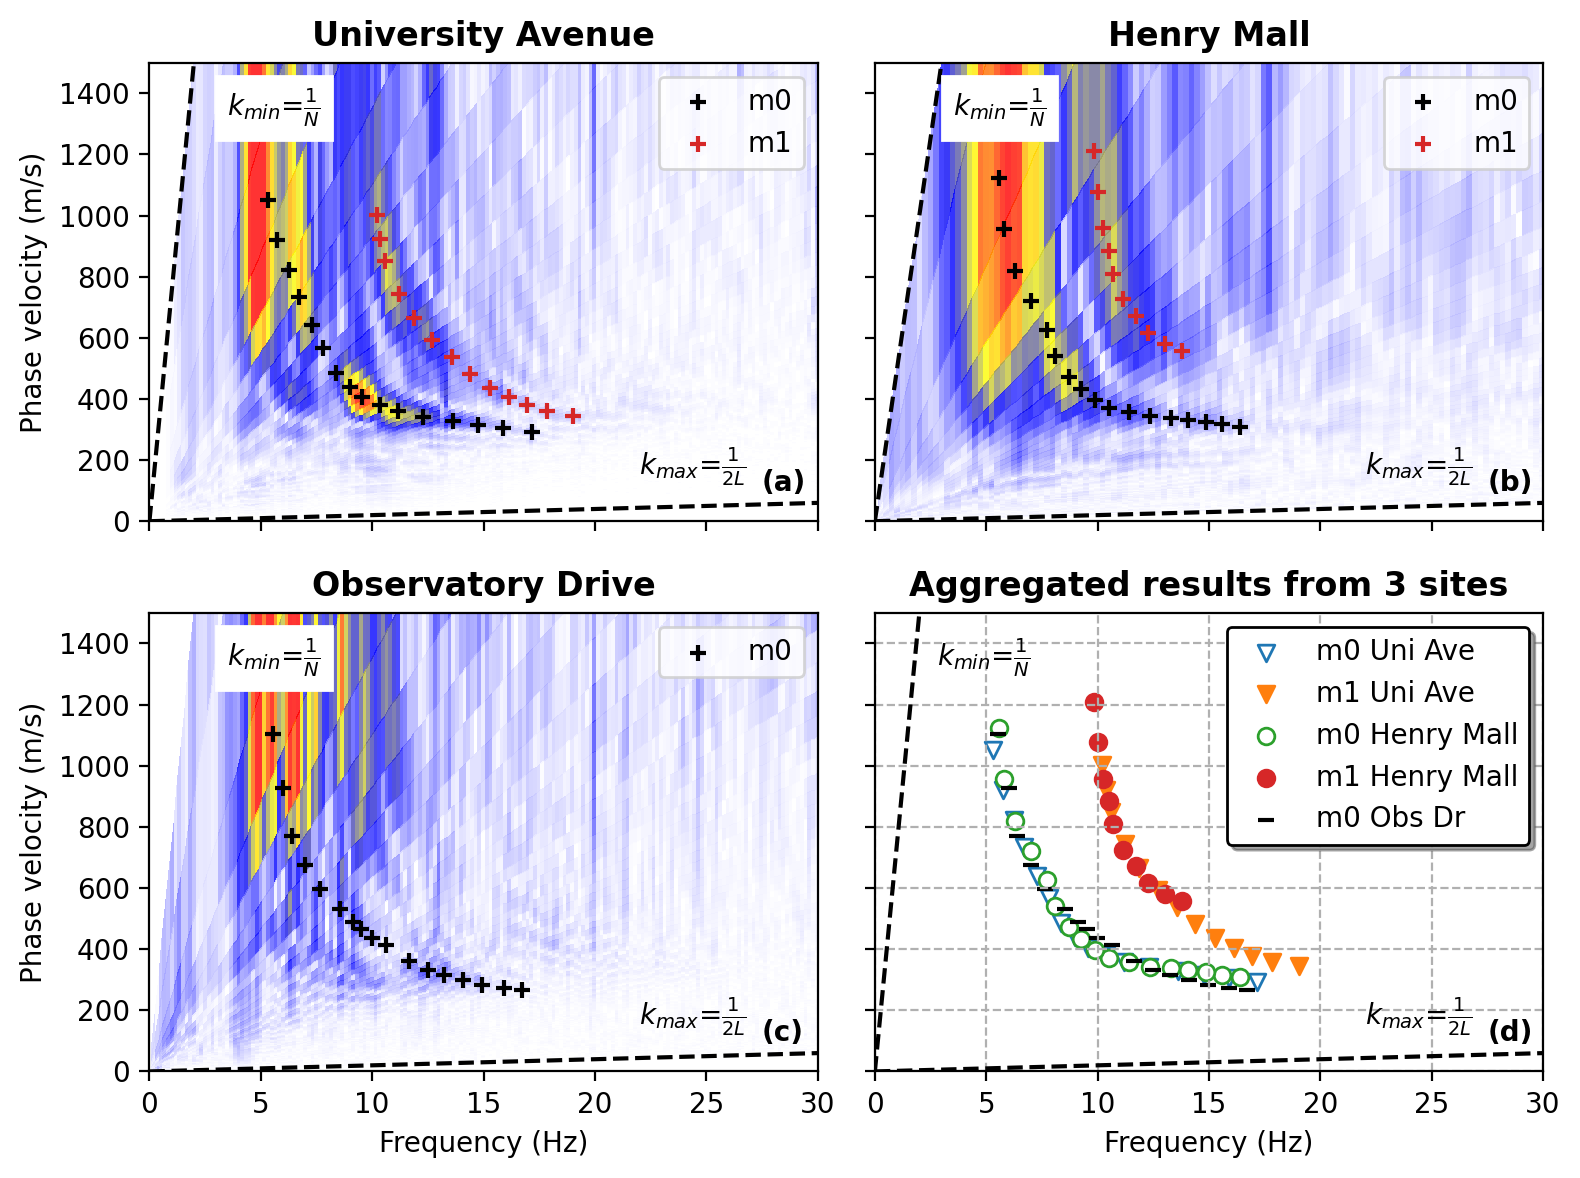

In [45]:
fig, axs = plt.subplots(2,2,figsize = (8,6),sharex = True,
                        sharey = True)

############################## University Avenue #############################################

axs[0,0].pcolormesh(f_p_ua,v_ua,energy_first_quadrant_ua/np.max(energy_first_quadrant_ua),
              cmap = cmap, vmin = 0, vmax = 0.7,alpha = 0.8)

axs[0,0].scatter(funda_mode['X'], funda_mode['Y'],marker = "+",c = 'k',label = 'm0')
axs[0,0].scatter(frist_mode['X'], frist_mode['Y'],marker = "+",c = '#d62728',label = 'm1')
axs[0,0].plot([0,40], [0,80],ls = '--',c = 'k')
axs[0,0].plot([0,40], [0,50/0.00166389],ls = '--',c = 'k')

axs[0,0].text(22,150,r"$k_{max}$=$\frac{1}{2L}$")
axs[0,0].text(3.5,1325,r"$k_{min}$=$\frac{1}{N}$",backgroundcolor = 'w')
axs[0,0].text(27.5,100,"(a)",fontweight = 'bold')
axs[0,0].legend()
axs[0,0].set_title('University Avenue',fontweight = 'bold')
# plt.colorbar()
axs[0,0].set_xlim(0,30)
# plt.ylim(99.5, 1499.5)
axs[0,0].set_ylim(0,1500)

# plt.xlabel('Frequency (Hz)') 
axs[0,0].set_ylabel('Phase velocity (m/s)') 

############################## Henry Mall ###########################################

pm = axs[0,1].pcolormesh(f_p_hm,v_hm,energy_first_quadrant_hm/np.max(energy_first_quadrant_hm),
              cmap = cmap, vmin = 0, vmax = 1,alpha = 0.8)

axs[0,1].scatter(funda_mode_hm['X'], funda_mode_hm['Y'],marker = "+",c = 'k',label = 'm0')
axs[0,1].scatter(frist_mode_hm['X'], frist_mode_hm['Y'],marker = "+",c = '#d62728',label = 'm1')
axs[0,1].plot([0,40], [0,80],ls = '--',c = 'k')
axs[0,1].plot([0,40], [0,50/0.0024937655860349127],ls = '--',c = 'k')

axs[0,1].text(22,150,r"$k_{max}$=$\frac{1}{2L}$")
axs[0,1].text(3.5,1325,r"$k_{min}$=$\frac{1}{N}$",backgroundcolor = 'w')
axs[0,1].text(27.5,100,"(b)",fontweight = 'bold')
axs[0,1].legend()
axs[0,1].set_title('Henry Mall',fontweight = 'bold')
# plt.colorbar()
axs[0,1].set_xlim(0,30)
# plt.ylim(99.5, 1499.5)
axs[0,1].set_ylim(0,1500)
# cbar1 = fig.colorbar(pm,ax = axs[0,1])
# cbar1.set_label("Normalized spectra")

############################ Observatory Drive ##################################################

axs[1,0].pcolormesh(f_p_od,v_od,energy_first_quadrant_od/np.max(energy_first_quadrant_od),
              cmap = cmap, vmin = 0, vmax = 0.7,alpha = 0.8)

axs[1,0].scatter(funda_mode_od['X'], funda_mode_od['Y'],marker = "+",c = 'k',label = 'm0')

axs[1,0].plot([0,40], [0,80],ls = '--',c = 'k')

axs[1,0].text(22,150,r"$k_{max}$=$\frac{1}{2L}$")
axs[1,0].text(3.5,1325,r"$k_{min}$=$\frac{1}{N}$",backgroundcolor = 'w')
axs[1,0].text(27.5,100,"(c)",fontweight = 'bold')
axs[1,0].legend()
axs[1,0].set_title('Observatory Drive',fontweight = 'bold')
# plt.colorbar()
axs[1,0].set_xlim(0,30)
# plt.ylim(99.5, 1499.5)
axs[1,0].set_ylim(0,1500)
axs[1,0].set_xlabel('Frequency (Hz)')  
axs[1,0].set_ylabel('Phase velocity (m/s)') 

############################ Aggregated ds from 3 sites ##################################################

m0_H = axs[1,1].scatter(funda_mode['X'], funda_mode['Y'],marker = "v",c = 'w',edgecolor = '#1f77b4',label = 'm0 Uni Ave')
m1_H = axs[1,1].scatter(frist_mode['X'], frist_mode['Y'],marker = "v",c = '#ff7f0e',label = 'm1 Uni Ave')

m0_U = axs[1,1].scatter(funda_mode_hm['X'], funda_mode_hm['Y'],marker = "o",c = 'w',edgecolor = '#2ca02c',label = 'm0 Henry Mall')
m1_U = axs[1,1].scatter(frist_mode_hm['X'], frist_mode_hm['Y'],marker = "o",c = '#d62728',label = 'm1 Henry Mall')

m0_O = axs[1,1].scatter(funda_mode_od['X'], funda_mode_od['Y'],marker = "_",c = 'k',label = 'm0 Obs Dr')

axs[1,1].plot([0,40], [0,80],ls = '--',c = 'k')
axs[1,1].plot([0,40], [0,50/0.00166389],ls = '--',c = 'k')

axs[1,1].text(22,150,r"$k_{max}$=$\frac{1}{2L}$")
axs[1,1].text(2.8,1325,r"$k_{min}$=$\frac{1}{N}$")
axs[1,1].legend(loc = 'upper right', shadow = True,edgecolor = 'k')

axs[1,1].set_xlim(0,30)
axs[1,1].grid(ls = '--')

axs[1,1].text(27.5,100,"(d)",fontweight = 'bold')

axs[1,1].set_xlabel('Frequency (Hz)')  
axs[1,1].set_title('Aggregated results from 3 sites',fontweight = 'bold')


plt.tight_layout()

# fig.savefig('energy_plot.png', dpi=600,bbox_inches = 'tight')

plt.show()